In [3]:
# 다이아티어 플레이어별 랭크 게임 10분 전적 데이터 불러오기
# 항목 보기

tenmin=pd.read_csv("high_diamond_ranked_10min.csv")
list(tenmin)

['gameId',
 'blueWins',
 'blueWardsPlaced',
 'blueWardsDestroyed',
 'blueFirstBlood',
 'blueKills',
 'blueDeaths',
 'blueAssists',
 'blueEliteMonsters',
 'blueDragons',
 'blueHeralds',
 'blueTowersDestroyed',
 'blueTotalGold',
 'blueAvgLevel',
 'blueTotalExperience',
 'blueTotalMinionsKilled',
 'blueTotalJungleMinionsKilled',
 'blueGoldDiff',
 'blueExperienceDiff',
 'blueCSPerMin',
 'blueGoldPerMin',
 'redWardsPlaced',
 'redWardsDestroyed',
 'redFirstBlood',
 'redKills',
 'redDeaths',
 'redAssists',
 'redEliteMonsters',
 'redDragons',
 'redHeralds',
 'redTowersDestroyed',
 'redTotalGold',
 'redAvgLevel',
 'redTotalExperience',
 'redTotalMinionsKilled',
 'redTotalJungleMinionsKilled',
 'redGoldDiff',
 'redExperienceDiff',
 'redCSPerMin',
 'redGoldPerMin']

In [4]:
# 다시 보니까 여기서 부터 결정계수 히트맵을 만들었어야함
tenmin

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  \
0     4519157822         0               28                   2   
1     4523371949         0               12                   1   
2     4521474530         0               15                   0   
3     4524384067         0               43                   1   
4     4436033771         0               75                   4   
...          ...       ...              ...                 ...   
9874  4527873286         1               17                   2   
9875  4527797466         1               54                   0   
9876  4527713716         0               23                   1   
9877  4527628313         0               14                   4   
9878  4523772935         1               18                   0   

      blueFirstBlood  blueKills  blueDeaths  blueAssists  blueEliteMonsters  \
0                  1          9           6           11                  0   
1                  0          5           5            5                  0   
2                  0          7          11            4                  1   
3                  0          4           5            5                  1   
4                  0          6           6            6                  0   
...              ...        ...         ...          ...                ...   
9874               1          7           4            5                  1   
9875               0          6           4            8                  1   
9876               0          6           7            5                  0   
9877               1          2           3            3                  1   
9878               1          6           6            5                  0   

      blueDragons  ...  redTowersDestroyed  redTotalGold  redAvgLevel  \
0               0  ...                   0         16567          6.8   
1               0  ...                   1         17620          6.8   
2               1  ...                   0         17285          6.8   
3               0  ...                   0         16478          7.0   
4               0  ...                   0         17404          7.0   
...           ...  ...                 ...           ...          ...   
9874            1  ...                   0         15246          6.8   
9875            1  ...                   0         15456          7.0   
9876            0  ...                   0         18319          7.4   
9877            1  ...                   0         15298          7.2   
9878            0  ...                   0         15339          6.8   

      redTotalExperience  redTotalMinionsKilled  redTotalJungleMinionsKilled  \
0                  17047                    197                           55   
1                  17438                    240                           52   
2                  17254                    203                           28   
3                  17961                    235                           47   
4                  18313                    225                           67   
...                  ...                    ...                          ...   
9874               16498                    229                           34   
9875               18367                    206                           56   
9876               19909                    261                           60   
9877               18314                    247                           40   
9878               17379                    201                           46   

      redGoldDiff  redExperienceDiff  redCSPerMin  redGoldPerMin  
0            -643                  8         19.7         1656.7  
1            2908               1173         24.0         1762.0  
2            1172               1033         20.3         1728.5  
3            1321                  7         23.5         1647.8  
4            1004               -230         22.5         1740.4  
...           ..

In [5]:
tenmin_raw=tenmin.copy()
tenmin_new=tenmin.iloc[:,1:].copy()

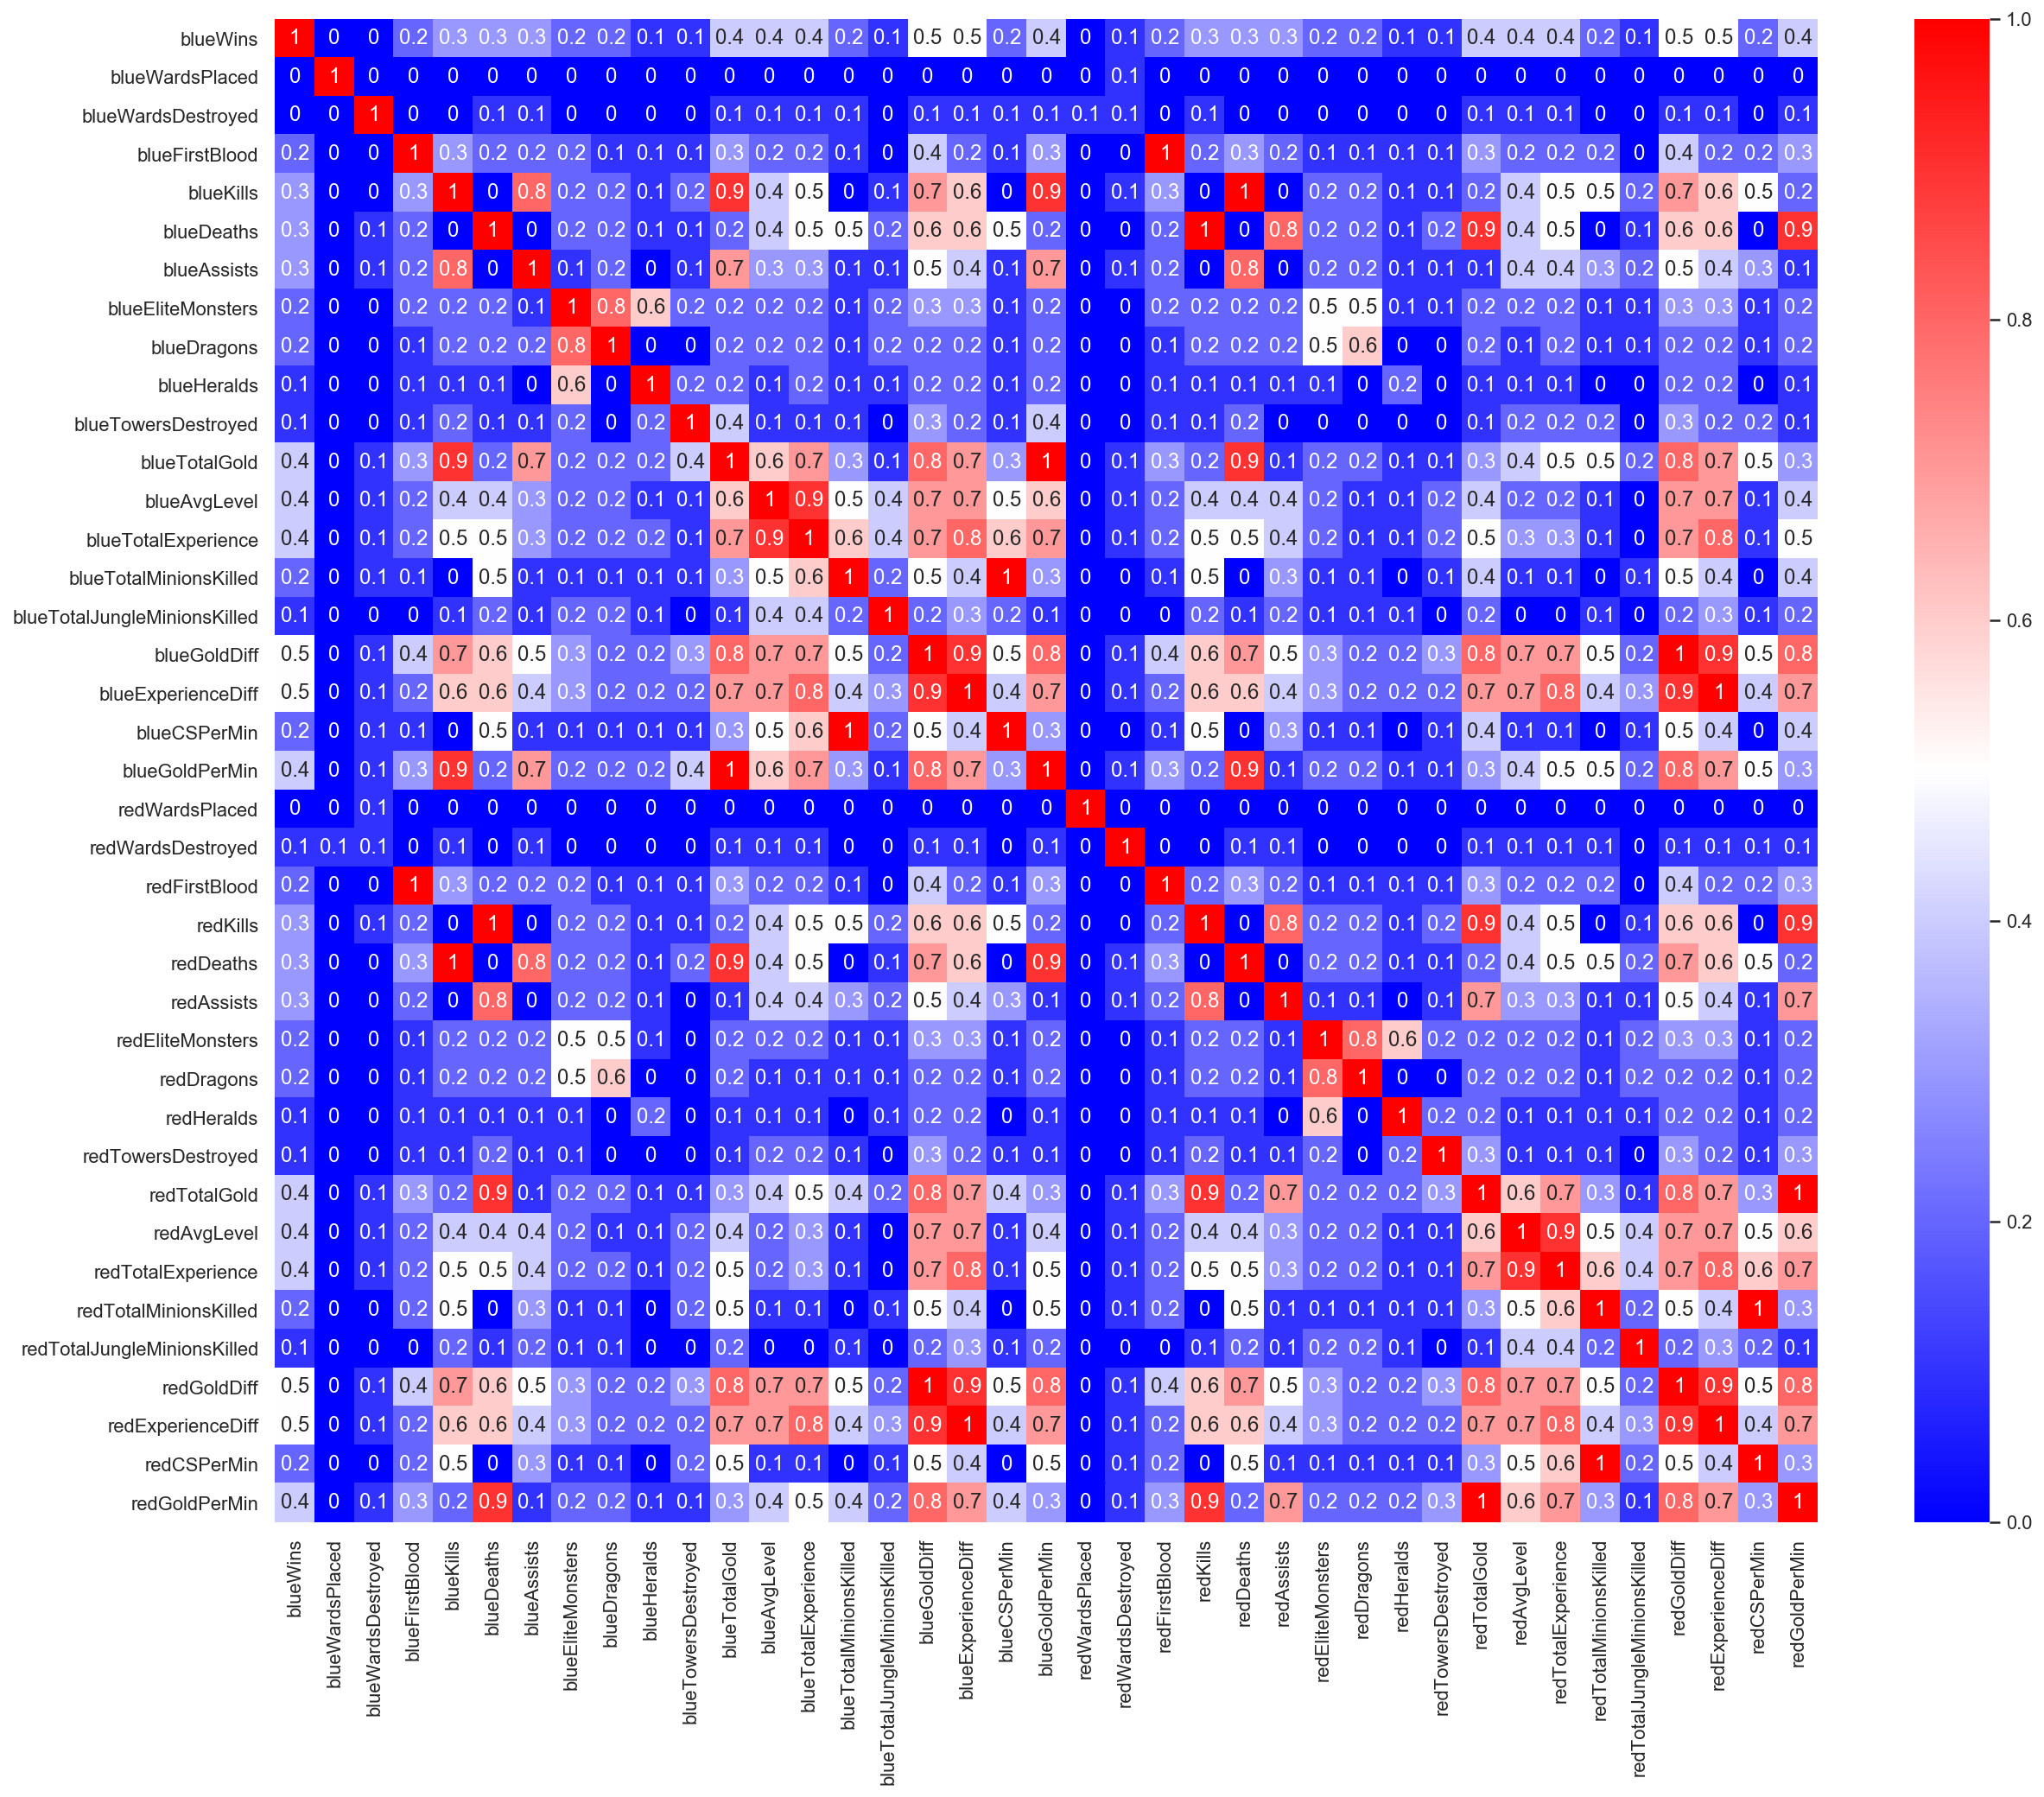

In [6]:
corr_mat = tenmin_new.corr().abs().round(1)
sns.set(rc={'figure.figsize':(20,16)})
sns.heatmap(data=corr_mat, annot=True, cmap='bwr')

#### 1. column edit

#### 1-1. drop blue columns with corr_val == 1 to each other
- drop blueEliteMonsters, blueCSPerMin, blueTotalExperience
- 그리고 blueAvgLevel은 blueExperienceDiff하고 아주 밀접하니 주의해야한다

제거 이유: 다음과 같이 히트맵에서 서로 1의 Corr_val을 보여서 불필요한 항목 최소화 작업:
        - blueCSpermin (<-> blueTotalMinionsKilled)
        - blueEliteMonsters (<-> blueDragons, blueHeralds),
        - blueTotalExperience (<-> blueAvgLevel)

In [7]:
import re

In [8]:
re.findall("red\w+", str(list(tenmin_raw)))

['redWardsPlaced',
 'redWardsDestroyed',
 'redFirstBlood',
 'redKills',
 'redDeaths',
 'redAssists',
 'redEliteMonsters',
 'redDragons',
 'redHeralds',
 'redTowersDestroyed',
 'redTotalGold',
 'redAvgLevel',
 'redTotalExperience',
 'redTotalMinionsKilled',
 'redTotalJungleMinionsKilled',
 'redGoldDiff',
 'redExperienceDiff',
 'redCSPerMin',
 'redGoldPerMin']

In [9]:
tenmin_df = tenmin_raw.drop(columns=["blueCSPerMin", "blueEliteMonsters", "blueTotalExperience"])
tenmin_df = tenmin_df.drop(tenmin_df[re.findall("red\w+", str(list(tenmin_df)))],axis=1)
tenmin_df

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  \
0     4519157822         0               28                   2   
1     4523371949         0               12                   1   
2     4521474530         0               15                   0   
3     4524384067         0               43                   1   
4     4436033771         0               75                   4   
...          ...       ...              ...                 ...   
9874  4527873286         1               17                   2   
9875  4527797466         1               54                   0   
9876  4527713716         0               23                   1   
9877  4527628313         0               14                   4   
9878  4523772935         1               18                   0   

      blueFirstBlood  blueKills  blueDeaths  blueAssists  blueDragons  \
0                  1          9           6           11            0   
1                  0          5           5            5            0   
2                  0          7          11            4            1   
3                  0          4           5            5            0   
4                  0          6           6            6            0   
...              ...        ...         ...          ...          ...   
9874               1          7           4            5            1   
9875               0          6           4            8            1   
9876               0          6           7            5            0   
9877               1          2           3            3            1   
9878               1          6           6            5            0   

      blueHeralds  blueTowersDestroyed  blueTotalGold  blueAvgLevel  \
0               0                    0          17210           6.6   
1               0                    0          14712           6.6   
2               0                    0          16113           6.4   
3               1                    0          15157           7.0   
4               0                    0          16400           7.0   
...           ...                  ...            ...           ...   
9874            0                    0          17765           7.2   
9875            0                    0          16238           7.2   
9876            0                    0          15903           7.0   
9877            0                    0          14459           6.6   
9878            0                    0          16266           7.0   

      blueTotalMinionsKilled  blueTotalJungleMinionsKilled  blueGoldDiff  \
0                        195                            36           643   
1                        174                            43         -2908   
2                        186                            46         -1172   
3                        201                            55         -1321   
4                        210                            57         -1004   
...                      ...                           ...           ...   
9874                     211                            69          2519   
9875                     233                            48           782   
9876                     210                            45         -2416   
9877                     224                            48          -839   
9878                     207                            44           927   

      blueExperienceDiff  blueGoldPerMin  
0                     -8          1721.0  
1                  -1173          1471.2  
2                  -1033          1611.3  
3                     -7          1515.7  
4                    230          1640.0  
...                  ...             ...  
9874                2469          1776.5  
9875                 888          1623.8  
9876               -1877          1590.3  
9877               -1085          1445.9  
9878                 -58          1626.6  

[9879 rows x 18 columns]

In [12]:
# tenmin3에서 추가, 제거, 수정고려해야할 항목들
# 추가 : redTotalJungleMinionsKilled, redTotalMinionsKilled, redAvgLevel, redTowersDestroyed, redHeralds, redDragons

# 고려사항 : blueDeath하고 redTotalGold의 상관지수 절대값이 0.9이다, 오히려 GoldDiff하고 ExperienceDiff를 제외해야하나?

#### 1-2. re-add dropped red columns as exception
- exception : redTotalJungleMinionsKilled, redTotalMinionsKilled,
              redAvgLevel, redTowersDestroyed, redHeralds, redDragons
              
- reason for exception : blue항목들 중 동일한 카테고리이름을 가진 이 항목들은 한쪽 팀이 1이면 다른 팀이 0이라는 전제가 성립하지 않기 때문

In [10]:
add = pd.DataFrame(data=tenmin[["gameId","redTotalJungleMinionsKilled", "redTotalMinionsKilled", "redAvgLevel", "redTowersDestroyed", "redHeralds", "redDragons"]], columns=["gameId", "redTotalJungleMinionsKilled", "redTotalMinionsKilled", "redAvgLevel", "redTowersDestroyed", "redHeralds", "redDragons"])

In [11]:
add

gameId  redTotalJungleMinionsKilled  redTotalMinionsKilled  \
0     4519157822                           55                    197   
1     4523371949                           52                    240   
2     4521474530                           28                    203   
3     4524384067                           47                    235   
4     4436033771                           67                    225   
...          ...                          ...                    ...   
9874  4527873286                           34                    229   
9875  4527797466                           56                    206   
9876  4527713716                           60                    261   
9877  4527628313                           40                    247   
9878  4523772935                           46                    201   

      redAvgLevel  redTowersDestroyed  redHeralds  redDragons  
0             6.8                   0           0           0  
1             6.8                   1           1           1  
2             6.8                   0           0           0  
3             7.0                   0           0           0  
4             7.0                   0           0           1  
...           ...                 ...         ...         ...  
9874          6.8                   0           0           0  
9875          7.0                   0           0           0  
9876          7.4                   0           0           1  
9877          7.2                   0           0           0  
9878          6.8                   0           0           1  

[9879 rows x 7 columns]

In [12]:
df = pd.merge(tenmin_df, add, on="gameId")
df

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  \
0     4519157822         0               28                   2   
1     4523371949         0               12                   1   
2     4521474530         0               15                   0   
3     4524384067         0               43                   1   
4     4436033771         0               75                   4   
...          ...       ...              ...                 ...   
9874  4527873286         1               17                   2   
9875  4527797466         1               54                   0   
9876  4527713716         0               23                   1   
9877  4527628313         0               14                   4   
9878  4523772935         1               18                   0   

      blueFirstBlood  blueKills  blueDeaths  blueAssists  blueDragons  \
0                  1          9           6           11            0   
1                  0          5           5            5            0   
2                  0          7          11            4            1   
3                  0          4           5            5            0   
4                  0          6           6            6            0   
...              ...        ...         ...          ...          ...   
9874               1          7           4            5            1   
9875               0          6           4            8            1   
9876               0          6           7            5            0   
9877               1          2           3            3            1   
9878               1          6           6            5            0   

      blueHeralds  ...  blueTotalJungleMinionsKilled  blueGoldDiff  \
0               0  ...                            36           643   
1               0  ...                            43         -2908   
2               0  ...                            46         -1172   
3               1  ...                            55         -1321   
4               0  ...                            57         -1004   
...           ...  ...                           ...           ...   
9874            0  ...                            69          2519   
9875            0  ...                            48           782   
9876            0  ...                            45         -2416   
9877            0  ...                            48          -839   
9878            0  ...                            44           927   

      blueExperienceDiff  blueGoldPerMin  redTotalJungleMinionsKilled  \
0                     -8          1721.0                           55   
1                  -1173          1471.2                           52   
2                  -1033          1611.3                           28   
3                     -7          1515.7                           47   
4                    230          1640.0                           67   
...                  ...             ...                          ...   
9874                2469          1776.5                           34   
9875                 888          1623.8                           56   
9876               -1877          1590.3                           60   
9877               -1085          1445.9                           40   
9878                 -58          1626.6                           46   

      redTotalMinionsKilled  redAvgLevel  redTowersDestroyed  redHeralds  \
0                       197          6.8                   0           0   
1                       240          6.8                   1           1   
2                       203          6.8                   0           0   
3                       235          7.0                   0           0   
4                       225          7.0                   0           0   
...                     ...          ...                 ...         ...   
9874                    229          6.8                   0           0   
98

그리고 blueAvgLevel은 blueExperienceDiff하고 아주 밀접하니 주의해야한다

In [13]:
# 블루팀과 레드팀 겹치는 특성이 너무 많아 'red'가 들어간 특성은 모두 drop
# X는 blue팀 전적, y는 blue팀 승패 

X = df.drop(['gameId', 'blueWins'], axis=1)
y = df['blueWins']

In [14]:
# 일단 특성 중요도를 알아보기 위해서
# train test split 그리고 그리드서치 및 정확도 분석

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
np.unique(y_train, return_counts=True)

(array([0, 1]), array([3953, 3950]))

In [15]:
feature_name = list(X)
X_train.columns = feature_name
X_test.columns = feature_name
X_train.head()

blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  \
6096               22                   1               0          5   
8159               16                   1               0          8   
8354               23                   1               0          8   
6281               16                   1               1          2   
6659               17                   3               0          7   

      blueDeaths  blueAssists  blueDragons  blueHeralds  blueTowersDestroyed  \
6096           5            2            0            0                    0   
8159           4           10            0            1                    0   
8354           9            8            0            1                    0   
6281           7            2            0            0                    0   
6659          12            5            0            0                    0   

      blueTotalGold  ...  blueTotalJungleMinionsKilled  blueGoldDiff  \
6096          15752  ...                            55          -717   
8159          16696  ...                            44           865   
8354          17380  ...                            60          -213   
6281          15198  ...                            67         -1157   
6659          15674  ...                            42         -3878   

      blueExperienceDiff  blueGoldPerMin  redTotalJungleMinionsKilled  \
6096                   8          1575.2                           54   
8159                1006          1669.6                           39   
8354                 399          1738.0                           36   
6281                 -84          1519.8                           48   
6659               -3868          1567.4                           55   

      redTotalMinionsKilled  redAvgLevel  redTowersDestroyed  redHeralds  \
6096                    218          7.2                   0           0   
8159                    220          6.6                   0           0   
8354                    215          7.0                   0           0   
6281                    211          7.4                   0           0   
6659                    207          7.2                   0           0   

      redDragons  
6096           0  
8159           0  
8354           0  
6281           1  
6659           1  

[5 rows x 22 columns]

In [16]:
# 트레인 테스트 모델 데이터 갯수 일치한거 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7903, 22), (1976, 22), (7903,), (1976,))

In [17]:
y_train.value_counts()

0    3953
1    3950
Name: blueWins, dtype: int64

In [18]:
y_test.value_counts()

0    996
1    980
Name: blueWins, dtype: int64

In [19]:
# 특성 갯수 확인 
len(list(X))

22

In [20]:
# 그리드서처 임포트해서 랜덤포레스트 적용
# 최적의 조건을 구해봤습니다
# n_estimator? 

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth' : [4, 6, 8, 10],
    'n_estimators' : [50, 100, 200],
    'min_samples_leaf' : [8, 12],
    'min_samples_split' : [8, 12]
}

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=13,
                                    

In [21]:
# 분석중
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [22]:
target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_max_depth']

In [23]:
cv_results_df[target_col].sort_values('rank_test_score').head()

rank_test_score  mean_test_score param_n_estimators param_max_depth
1                 1         0.730483                100               4
4                 1         0.730483                100               4
22                3         0.729977                100               6
19                3         0.729977                100               6
7                 5         0.729850                100               4

In [24]:
grid_cv.best_params_

{'max_depth': 4,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 100}

In [25]:
grid_cv.best_score_

0.7304828596153077

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(X_train, y_train)

pred1 = rf_clf_best.predict(X_test)

accuracy_score(y_test, pred1)

0.722165991902834

In [28]:
# 흥미로운 발견 1. 돈이 경험치보다 중요. 더 정확하겐, 금액보단 금액차이가 더 중요
# 흥미로운 발견 2. 킬 보다 죽지 않는게 더 중요
# 흥미로운 발견 3. blueHeralds는 게임 진행 8분후에 등장함
# 10분으로 제한되어 있는 데이터셋에서
# blueHeralds가 1인 표본크기가 충분한지 확인해야함
# 적으면 빼야할지 고민해볼 필요가 있다 
# blueTowersDestroyed도 마찬가지다
# blueDragons도 5분이어서 확인해야하는데 

best_cols_values = rf_clf_best.feature_importances_
best_cols = pd.Series(best_cols_values, index=X_train.columns)
top20_cols = best_cols.sort_values(ascending=False)[:20]
top20_cols

blueGoldDiff                    0.326785
blueExperienceDiff              0.169286
blueTotalGold                   0.113941
blueGoldPerMin                  0.106091
blueDeaths                      0.059101
redAvgLevel                     0.049852
blueKills                       0.042453
blueAvgLevel                    0.041664
blueAssists                     0.023225
redDragons                      0.021289
blueDragons                     0.014962
blueFirstBlood                  0.008893
blueTotalMinionsKilled          0.007626
redTotalMinionsKilled           0.006734
blueTotalJungleMinionsKilled    0.003425
redTotalJungleMinionsKilled     0.002016
blueWardsPlaced                 0.000684
redTowersDestroyed              0.000641
blueWardsDestroyed              0.000518
redHeralds                      0.000394
dtype: float64

gold diff를 결정짓는 요인들 중요도를 비교해서 우선순위 도출
즉, 스노우볼링을 중점적으로 봤을때 가장 기여하는 특성은 무엇인지 고려해볼 필요가 있다

blueWins하고 blueGoldDiff는 얼마나 서로 설명을 잘하는지 선형회귀모델하고
어쨌든 blueWin이 yes no 이중분류 데이터이니까 로그함수 회귀모델도 구현

In [29]:
df.head()

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0  4519157822         0               28                   2               1   
1  4523371949         0               12                   1               0   
2  4521474530         0               15                   0               0   
3  4524384067         0               43                   1               0   
4  4436033771         0               75                   4               0   

   blueKills  blueDeaths  blueAssists  blueDragons  blueHeralds  ...  \
0          9           6           11            0            0  ...   
1          5           5            5            0            0  ...   
2          7          11            4            1            0  ...   
3          4           5            5            0            1  ...   
4          6           6            6            0            0  ...   

   blueTotalJungleMinionsKilled  blueGoldDiff  blueExperienceDiff  \
0                            36           643                  -8   
1                            43         -2908               -1173   
2                            46         -1172               -1033   
3                            55         -1321                  -7   
4                            57         -1004                 230   

   blueGoldPerMin  redTotalJungleMinionsKilled  redTotalMinionsKilled  \
0          1721.0                           55                    197   
1          1471.2                           52                    240   
2          1611.3                           28                    203   
3          1515.7                           47                    235   
4          1640.0                           67                    225   

   redAvgLevel  redTowersDestroyed  redHeralds  redDragons  
0          6.8                   0           0           0  
1          6.8                   1           1           1  
2          6.8                   0           0           0  
3          7.0                   0           0           0  
4          7.0                   0           0           1  

[5 rows x 24 columns]

In [102]:
corr_mat = df.drop(columns=["gameId"]).corr().round(1)
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data=corr_mat, annot=True, cmap='bwr')

SyntaxError: invalid syntax (<ipython-input-102-04674500f27a>, line 1)

배깅기법으로 랜덤포레스트를 통해서 얻은 

- blueWardsPlaced                 0.000684
- redTowersDestroyed              0.000641
- blueWardsDestroyed              0.000518
- redHeralds                      0.000394

#### recollect

종합적으로 골드량과 경험치량 그리고 특히 골드차이 그리고 경험치차이가 승패를 결정짓는데 가장 큰 역할을 하는듯 하다\
그렇다면 우리는 각 벌이수단마다 얼마나 중요한지 기여도를 비교해볼 필요가 있으며 (dragons과 hearlands의 경우 부가적인 버프효과도 있고\
킬하면 상대편 선수가 죽어서 그동안 영위활동을 못하는거)\
마찬가지로 레벨 격차를 벌리는게 더 중요한지 벌려지지 않도록 주의하는게 더 우선적인지\
최적의 플레이스타일에 대한 개념을 잡아봐야한다

#### boxplot (x='blueGoldDiff')

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='blueGoldDiff', y='blueWins', data=tenmin)
sns.swarmplot(x='blueGoldDiff', y='blueWins', data=tenmin, color=".25")
plt.show()

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(x='blueGoldDiff', y='blueWins', data=tenmin)
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f9321600560> (for post_execute):


KeyboardInterrupt: 

#### boxplot (x='blueExperienceDiff')

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='blueExperienceDiff', y='blueWins', data=tenmin, orient='h');

#### recollection : outliers

아웃라이어 판단하기\
실력이 동등하다는 가정하에 골드와 경험치 격차를 벌리는 정정당당 승부 지향\
afk의 경우가 다수 발생할 수 있는 점도 착안\
아웃라이어 기준을 검토해보고 그 기준에 해당하는 참값의 개수 파악 후 빼야될지 고려해봐야한다\



어느 쪽으로 더 기여하는지 긴가민가 변수들\
blueDeaths\
redDragons

blueGoldDiff                    0.326785
blueExperienceDiff              0.169286
blueTotalGold                   0.113941
blueGoldPerMin                  0.106091
blueDeaths                      0.059101
redAvgLevel                     0.049852
blueKills                       0.042453
blueAvgLevel                    0.041664
blueAssists                     0.023225
redDragons                      0.021289
blueDragons                     0.014962
blueFirstBlood                  0.008893
blueTotalMinionsKilled          0.007626
redTotalMinionsKilled           0.006734
blueTotalJungleMinionsKilled    0.003425
redTotalJungleMinionsKilled     0.002016
blueWardsPlaced                 0.000684
redTowersDestroyed              0.000641
blueWardsDestroyed              0.000518
redHeralds                      0.000394

blueGoldDiff

blueTotalGold                   0.113941
blueGoldPerMin 
blueKills 
blueAssists 
blueDragons
blueFirstBlood 
blueTotalMinionsKilled
blueTotalJungleMinionsKilled 

blueExperienceDiff

redAvgLevel
blueKills                       0.042453
blueAvgLevel                    0.041664
blueAssists                     0.023225
blueDragons
blueTotalMinionsKilled          0.007626
redTotalMinionsKilled 

##### recollection : drop more param

실수로 덜 제거한 값이 있다
blueGoldPerMin은 blueTotalGold가 다른 특성들과 갖는 선형관계 수치와 모두 같은 값을 갖는다.

In [ ]:
blueTotalGold, blueGoldPerMin

어느 쪽으로 더 기여하는지 긴가민가 변수들
blueDeaths
redDragons 

In [ ]:
max param은 4개로 두는게 제일 좋다고 하지만 위에 4개 항목은 서로 선형관계가 너무 뚜렷하게 나온다
어쨌든 골드디프가 엑스프디프보다 더 연관있다고 볼 수 있으니까 골드디프를 설명하는 파라미터들 중 어떤 것들이 더 중요한지 한번 비교해볼 필요가 있는데
그 다음으로는 킬하는 대상 수에 따라서 다른 것들이 역으로 가나? 볼 필요가 있다 
그리고 실제로 레벨 차이가 어느 정도로 벌려질 수 있는지 골드 격차가 최대 몇까지인지 그리고 그게 무슨 뜻을 내포하는지를 좀 파헤쳐볼 필요가 있다

In [33]:
# 블루팀과 레드팀 겹치는 특성이 너무 많아 'red'가 들어간 특성은 모두 drop
# X는 blue팀 전적, y는 blue팀 승패 

X = df.drop(['gameId', 'blueWins', 'blueGoldPerMin'], axis=1)
y = df['blueWins']

In [34]:
from sklearn.model_selection import train_test_split

In [37]:
# train test 객체 다시 생성
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
np.unique(y_train, return_counts=True)

(array([0, 1]), array([3953, 3950]))

In [38]:
X_train

blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  \
6096               22                   1               0          5   
8159               16                   1               0          8   
8354               23                   1               0          8   
6281               16                   1               1          2   
6659               17                   3               0          7   
...               ...                 ...             ...        ...   
5876               18                   5               1          9   
866                19                   5               0          4   
7696               15                   5               0          9   
74                 15                   3               1          6   
338                12                   2               1         14   

      blueDeaths  blueAssists  blueDragons  blueHeralds  blueTowersDestroyed  \
6096           5            2            0            0                    0   
8159           4           10            0            1                    0   
8354           9            8            0            1                    0   
6281           7            2            0            0                    0   
6659          12            5            0            0                    0   
...          ...          ...          ...          ...                  ...   
5876           4           10            0            0                    0   
866            4            4            0            0                    0   
7696           9            8            0            0                    0   
74             4            4            1            0                    0   
338            6           10            0            1                    1   

      blueTotalGold  ...  blueTotalMinionsKilled  \
6096          15752  ...                     217   
8159          16696  ...                     206   
8354          17380  ...                     220   
6281          15198  ...                     231   
6659          15674  ...                     206   
...             ...  ...                     ...   
5876          18307  ...                     244   
866           14892  ...                     199   
7696          16526  ...                     194   
74            16645  ...                     242   
338           20225  ...                     194   

      blueTotalJungleMinionsKilled  blueGoldDiff  blueExperienceDiff  \
6096                            55          -717                   8   
8159                            44           865                1006   
8354                            60          -213                 399   
6281                            67         -1157                 -84   
6659                            42         -3878               -3868   
...                            ...           ...                 ...   
5876                            49          3113                2284   
866                             49         -1750                -628   
7696                            41          -609               -1011   
74                              52          1151                 470   
338                             50          4453                2458   

      redTotalJungleMinionsKilled  redTotalMinionsKilled  redAvgLevel  \
6096                           54                    218          7.2   
8159                           39                    220          6.6   
8354                           36                    215          7.0   
6281                           48                    211          7.4   
6659                           55                    207          7.2   
...                           ...                    ...          ...   
5876                           48                    213          6.4   
866                            61                    250          7.2   
7696                           36

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7903, 21), (1976, 21), (7903,), (1976,))

2007    0
8130    1
4548    0
7468    1
4935    0
       ..
6871    1
8954    1
753     1
9304    1
3018    0
Name: blueWins, Length: 1976, dtype: int64

In [ ]:
# 중복되는 칼럼 하나 제거하고 나면
# 블루팀이 게임을 이겼는지 졌는지 의사결정나무(DecisionTree) 모델로 분석했을 경우
# 정확도가 높아질까?

In [70]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
dt_clf.fit(X_train, y_train)



from sklearn.metrics import accuracy_score

pred = dt_clf.predict(X_test)
print("accuracy score : ", accuracy_score(y_test, pred))

accuracy score :  0.7246963562753036


In [50]:
dt_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=13, splitter='best')

In [62]:
params = {
    'max_depth' : [1, 2, 3, 4, 6, 10, 14]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, return_train_score=True)

In [63]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=13,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 6, 10, 14]},
             pre_di

In [67]:
# 0.02 올라갔다 

print("best score : ", grid_cv.best_score_)

best score :  0.7247907509267487


In [65]:
# 4개 보다 더 작은 개수를 입력했음에도 여전히 최적의 파라미터 개수는 4개다
grid_cv.best_params_

{'max_depth': 4}

In [75]:
max_depths = [1, 2, 3, 4, 5, 8, 6, 10, 12, 16]
for depth in max_depths:
    dt_clf=DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print("Max_Depth = ", depth, "Accuracy = ", accuracy)
    

Max_Depth =  1 Accuracy =  0.7201417004048583
Max_Depth =  2 Accuracy =  0.7201417004048583
Max_Depth =  3 Accuracy =  0.7201417004048583
Max_Depth =  4 Accuracy =  0.7246963562753036
Max_Depth =  5 Accuracy =  0.7211538461538461
Max_Depth =  8 Accuracy =  0.7009109311740891
Max_Depth =  6 Accuracy =  0.7120445344129555
Max_Depth =  10 Accuracy =  0.6928137651821862
Max_Depth =  12 Accuracy =  0.6634615384615384
Max_Depth =  16 Accuracy =  0.6619433198380567


In [76]:
best_df_clf=grid_cv.best_estimator_

In [78]:
pred1 = best_df_clf.predict(X_test)

accuracy_score(y_test, pred1)

0.7246963562753036

In [79]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth' : max_depths,
    'n_estimators' : [50, 100, 200],
    'min_samples_leaf' : [8, 12],
    'min_samples_split' : [8, 12]
}

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)

In [80]:
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)

In [81]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=13,
                                    

In [83]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [84]:
cv_results_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.382651      0.021801         0.116895        0.009687   
1         0.893830      0.038436         0.107998        0.001964   
2         1.853835      0.027813         0.208305        0.000497   
3         0.405696      0.023317         0.109551        0.002084   
4         0.740030      0.031562         0.109782        0.002561   
..             ...           ...              ...             ...   
115       1.558182      0.005980         0.109388        0.001006   
116       2.960901      0.060899         0.207943        0.001775   
117       0.597137      0.071054         0.109629        0.002955   
118       1.531997      0.080476         0.107573        0.002393   
119       1.720484      0.060737         0.212433        0.001395   

    param_max_depth param_min_samples_leaf param_min_samples_split  \
0                 1                      8                       8   
1                 1                      8                       8   
2                 1                      8                       8   
3                 1                      8                      12   
4                 1                      8                      12   
..              ...                    ...                     ...   
115              16                     12                       8   
116              16                     12                       8   
117              16                     12                      12   
118              16                     12                      12   
119              16                     12                      12   

    param_n_estimators                                             params  \
0                   50  {'max_depth': 1, 'min_samples_leaf': 8, 'min_s...   
1                  100  {'max_depth': 1, 'min_samples_leaf': 8, 'min_s...   
2                  200  {'max_depth': 1, 'min_samples_leaf': 8, 'min_s...   
3                   50  {'max_depth': 1, 'min_samples_leaf': 8, 'min_s...   
4                  100  {'max_depth': 1, 'min_samples_leaf': 8, 'min_s...   
..                 ...                                                ...   
115                100  {'max_depth': 16, 'min_samples_leaf': 12, 'min...   
116                200  {'max_depth': 16, 'min_samples_leaf': 12, 'min...   
117                 50  {'max_depth': 16, 'min_samples_leaf': 12, 'min...   
118                100  {'max_depth': 16, 'min_samples_leaf': 12, 'min...   
119                200  {'max_depth': 16, 'min_samples_leaf': 12, 'min...   

     split0_test_score  split1_test_score  mean_test_score  std_test_score  \
0             0.719889           0.732220         0.726054        0.006166   
1             0.721154           0.732979         0.727066        0.005913   
2             0.720648           0.733485         0.727066        0.006419   
3             0.719889           0.732220         0.726054        0.006166   
4             0.721154           0.732979         0.727066        0.005913   
..                 ...                ...              ...             ...   
115           0.716093           0.735004         0.725548        0.009455   
116           0.715334           0.736016         0.725675        0.010341   
117           0.718117           0.732220         0.725169        0.007051   
118           0.716093           0.735004         0.725548        0.009455   
119           0.715334           0.736016         0.725675        0.010341   

     rank_test_score  
0                103  
1                 91  
2                 87  
3                103  
4                 91  
..               ...  
115              113  
116              111  
117              115  
118              113  
119              111  

[120 rows x 14 columns]

In [85]:
target_col=['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_max_depth']

In [88]:
cv_results_df[target_col].sort_values('rank_test_score').head()

rank_test_score  mean_test_score param_n_estimators param_max_depth
71                 1         0.730736                200               8
68                 1         0.730736                200               8
104                3         0.730357                200              12
107                3         0.730357                200              12
44                 5         0.729977                200               4

In [91]:
grid_cv.best_params_

{'max_depth': 8,
 'min_samples_leaf': 12,
 'min_samples_split': 8,
 'n_estimators': 200}

In [92]:
grid_cv.best_score_

0.7307361842489525

In [89]:
rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(X_train, y_train)

pred1 = rf_clf_best.predict(X_test)

accuracy_score(y_test, pred1)

0.722165991902834

In [94]:
best_cols_values = rf_clf_best.feature_importances_
best_cols = pd.Series(best_cols_values, index=X_train.columns)
top20_cols = best_cols.sort_values(ascending=False)[:20]
top20_cols

blueGoldDiff                    0.296469
blueExperienceDiff              0.177198
blueTotalGold                   0.117611
redAvgLevel                     0.072370
blueDeaths                      0.051524
blueAvgLevel                    0.047186
blueKills                       0.040671
blueTotalMinionsKilled          0.026533
blueDragons                     0.026011
redDragons                      0.023480
blueAssists                     0.022820
redTotalMinionsKilled           0.021837
blueTotalJungleMinionsKilled    0.019326
redTotalJungleMinionsKilled     0.018647
blueWardsPlaced                 0.014747
blueFirstBlood                  0.009989
blueWardsDestroyed              0.007858
blueHeralds                     0.002331
redHeralds                      0.002050
blueTowersDestroyed             0.000719
dtype: float64

In [ ]:
blueGoldDiff                    0.326785
blueExperienceDiff              0.169286
blueTotalGold                   0.113941
blueGoldPerMin                  0.106091
blueDeaths                      0.059101
redAvgLevel                     0.049852
blueKills                       0.042453
blueAvgLevel                    0.041664
blueAssists                     0.023225
redDragons                      0.021289
blueDragons                     0.014962
blueFirstBlood                  0.008893
blueTotalMinionsKilled          0.007626
redTotalMinionsKilled           0.006734
blueTotalJungleMinionsKilled    0.003425
redTotalJungleMinionsKilled     0.002016
blueWardsPlaced                 0.000684
redTowersDestroyed              0.000641
blueWardsDestroyed              0.000518
redHeralds                      0.000394

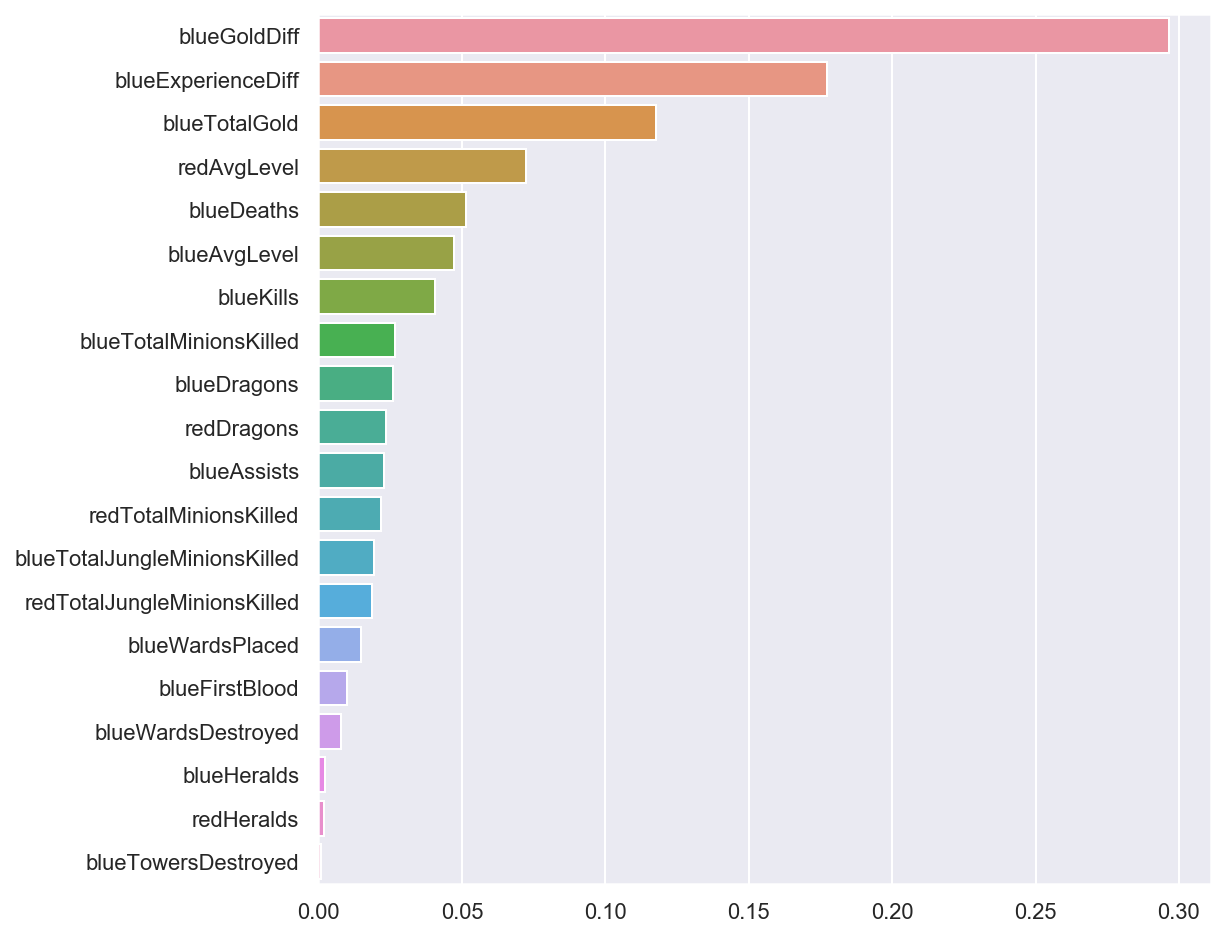

In [96]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.barplot(x=top20_cols, y=top20_cols.index)
plt.show()

In [ ]:
이전과 비교해보면 blueGoldPerMin을 빼니까 
0.326에서 0.296으로 골드디프가 0.03만큼 떨어졌다
반대로 blueExperienceDiff는 0.169에서 0.177로 0.08만큼 올라갔다

하위의 특성들도 수치가 바뀌면서 순위에 큰 변동이 있었다
-> win을 설명하는데 크게 의미 있는 수치라고 보기엔 너무 수치가 작다

GoldDiff와 ExpDiff

In [ ]:
blueExperienceDiff를 종속변수로 잡았을때 redAvgLevel 하고 blueAvgLevel가 독립변수로 얼마나 잘 설명하는가?

In [97]:
import plotly.express as px

fig=px.histogram(df, x="redAvgLevel")
fig.show()

In [98]:
fig=px.histogram(df, x="blueAvgLevel")
fig.show()

In [99]:
fig=px.histogram(df, x="blueExperienceDiff")
fig.show()

In [100]:
fig=px.histogram(df, x="blueGoldDiff")
fig.show()